In [1]:
from LSTM_VGG16.runCNN_LSTM import *

/home/mcicek/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
output_begin = 3
num_outputs = 3

timesteps = 1 # TimeseriesGenerator Handles overlapping
learning_rate = 0.0001
in_epochs = 1
out_epochs = 1
train_batch_size = 50
test_batch_size = 50

subjectList = [1, 2] #, 3, 4, 5, 7, 8, 11, 12, 149[i for i in range(1, 9)] + [i for i in range(10, 25)] except [6, 13, 10, ]
testSubjects = [3, 4]
trainingSubjects = [s for s in trainingSubjects if not s in testSubjects]

In [3]:
vgg_model, full_model = getFinalModel(timesteps = timesteps, lstm_nodes = lstm_nodes, 
                    lstm_dropout = lstm_dropout, lstm_recurrent_dropout = lstm_recurrent_dropout, 
                    num_outputs = num_outputs, lr = learning_rate, include_vgg_top = include_vgg_top)

In [4]:
full_model = trainCNN_LSTM(full_model, out_epochs, subjectList, timesteps, output_begin, num_outputs, 
                  batch_size = train_batch_size, in_epochs = in_epochs)

All frames and annotations from 2 datasets have been read by 2019-01-14 00:39:53.008083
1. set (Subject 2, F03) being trained for epoch 1!
Epoch 1/1
11/11 [==============================] - 5s 486ms/step - loss: 0.2336 - mean_absolute_error: 0.3809
2. set (Subject 1, F02) being trained for epoch 1!
Epoch 1/1
10/10 [==============================] - 4s 358ms/step - loss: 0.2427 - mean_absolute_error: 0.3840
Epoch 1 completed!


In [5]:
means, results = evaluateCNN_LSTM(full_model, label_rescaling_factor = label_rescaling_factor, 
                     testSubjects = testSubjects, timesteps = timesteps,  output_begin = output_begin, 
                    num_outputs = num_outputs, batch_size = test_batch_size)

All frames and annotations from 2 datasets have been read by 2019-01-14 00:40:13.967333
73/73 [==============================] - 4s 55ms/step
For the Subject 3 (F04):
	The absolute mean error on Pitch angle estimation: 29.00 Degree
	The absolute mean error on Yaw angle estimation: 27.26 Degree
	The absolute mean error on Roll angle estimation: 16.29 Degree
75/75 [==============================] - 4s 52ms/step
For the Subject 4 (F05):
	The absolute mean error on Pitch angle estimation: 15.40 Degree
	The absolute mean error on Yaw angle estimation: 37.76 Degree
	The absolute mean error on Roll angle estimation: 39.46 Degree
On average in 2 test subjects:
	The absolute mean error on Pitch angle estimations: 22.20 Degree
	The absolute mean error on Yaw angle estimations: 32.51 Degree
	The absolute mean error on Roll angle estimations: 27.87 Degree


In [132]:
def drawPlotsForSubj(outputs, subj, subjID, modelID, num_outputs = num_outputs, angles = angles):
    if num_outputs == 1: angles = ['Yaw']
    colors = ['#FFAA00', '#00AA00', '#0000AA', '#AA0000'] 
    title = 'Estimations for the Subject %d (Subject ID: %s, Total length: %d)\nby the Model %s' % (subj, subjID, outputs[0][0].shape[0], modelID)
    red, blue = (1.0, 0.95, 0.95), (0.95, 0.95, 1.0)
    f, rows = plt.subplots(num_outputs, 1, sharey=True, sharex=True, figsize=(16, 3*num_outputs))
    f.suptitle(title)
    for i, (matrix, absolute_mean_error) in enumerate(outputs):
        cell = rows
        if num_outputs > 1: cell = rows[i]
        l1 = cell.plot(matrix[:, 0], colors[i], label='Ground-truth')
        l2 = cell.plot(matrix[:, 1], colors[-1], label='Estimation')
        cell.set_facecolor(red if 'F' in subjID else blue)
        #cell.set_xlim([0, 1000])
        cell.set_ylim([-label_rescaling_factor, label_rescaling_factor])
        cell.set_ylabel('%s Angle\nAbsolute Mean Error: %.2f' % (angles[i], absolute_mean_error))
    f.subplots_adjust(top=0.93, hspace=0, wspace=0)
    plt.savefig('foo.png', bbox_inches='tight')

In [130]:
def drawResults(outputs, modelID, num_outputs = num_outputs, angles = angles):
    for subject, outputs in results:
        drawPlotsForSubj(outputs, subject, BIWI_Subject_IDs[subject], modelID, angles = angles)

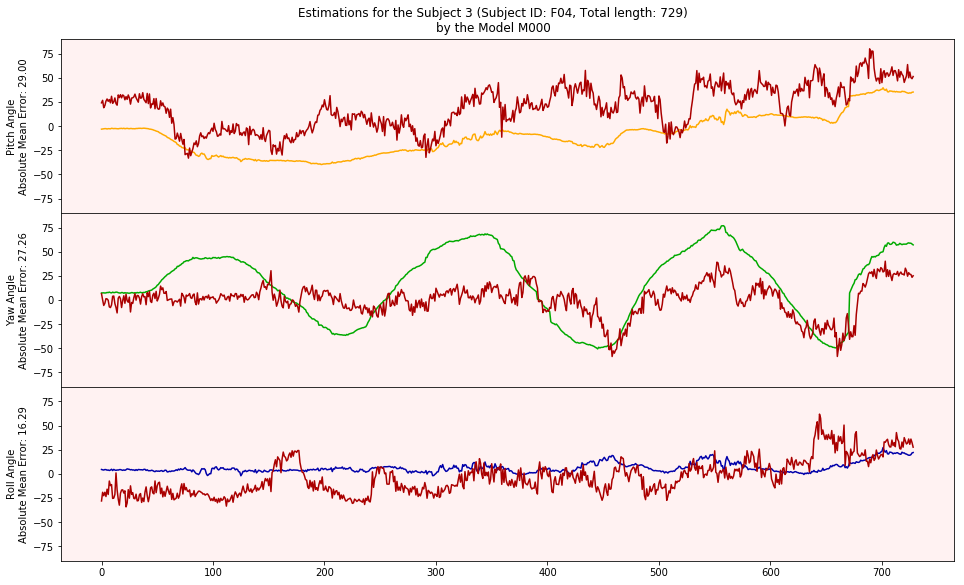

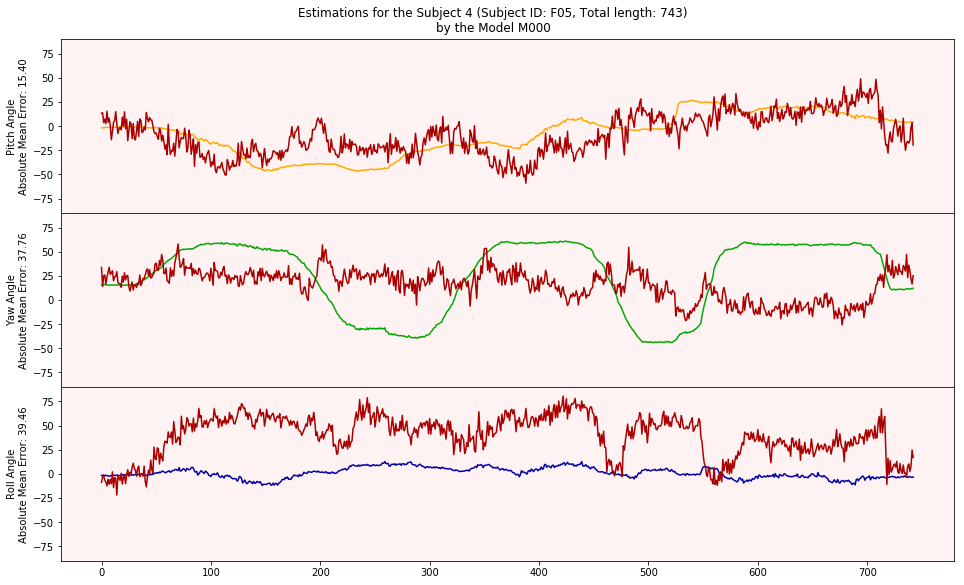

In [131]:
drawResults(results[:1], 'M000', num_outputs = num_outputs, angles = ['Pitch', 'Yaw', 'Roll'])

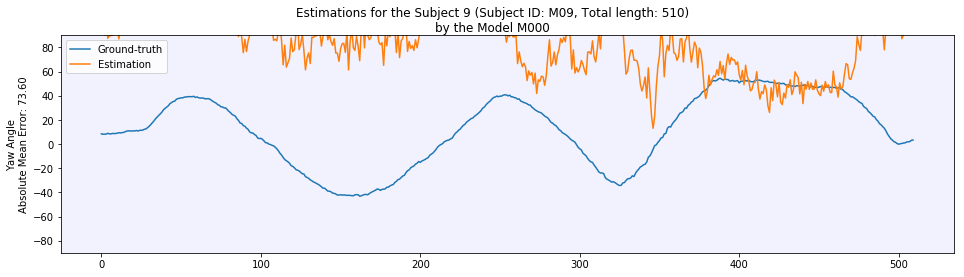

In [38]:
drawPlotsForSubj(outputs, 9, 'M09', 'M000')